<a href="https://colab.research.google.com/github/YashSinghal215/Walmart-Recruiting-Trip-Type-Classification/blob/main/Yash_Singhal_Trip_type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.loc[train.duplicated()].shape

(5704, 7)

In [ ]:
train.loc[train.duplicated(keep=False)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
55,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
59,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
134,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
135,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
460,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
...,...,...,...,...,...,...,...
646430,24,191177,Sunday,7.065200e+09,1,COOK AND DINE,905.0
646514,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646525,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646773,44,191277,Sunday,6.791453e+09,1,IMPULSE MERCHANDISE,347.0


In [ ]:
train = train.drop_duplicates()

In [ ]:
train.shape

(641350, 7)

In [ ]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [ ]:
len(train['TripType'].unique())

38

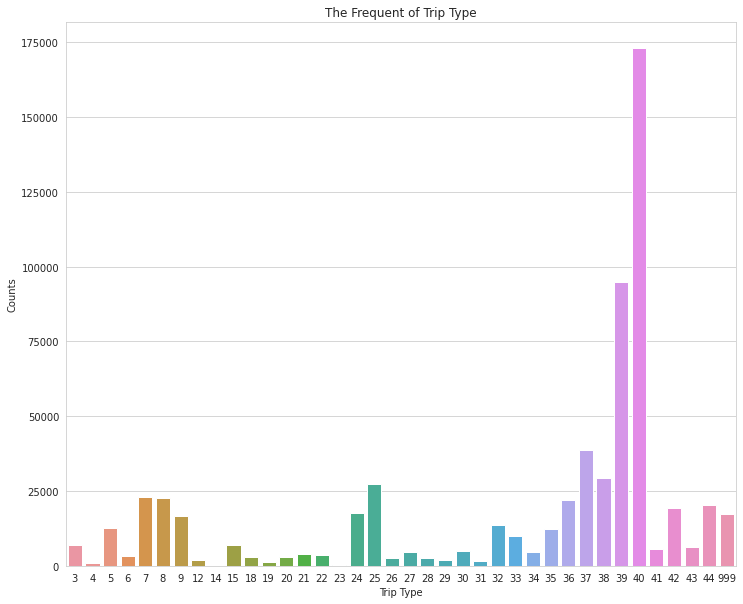

In [ ]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = train)
ax = ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

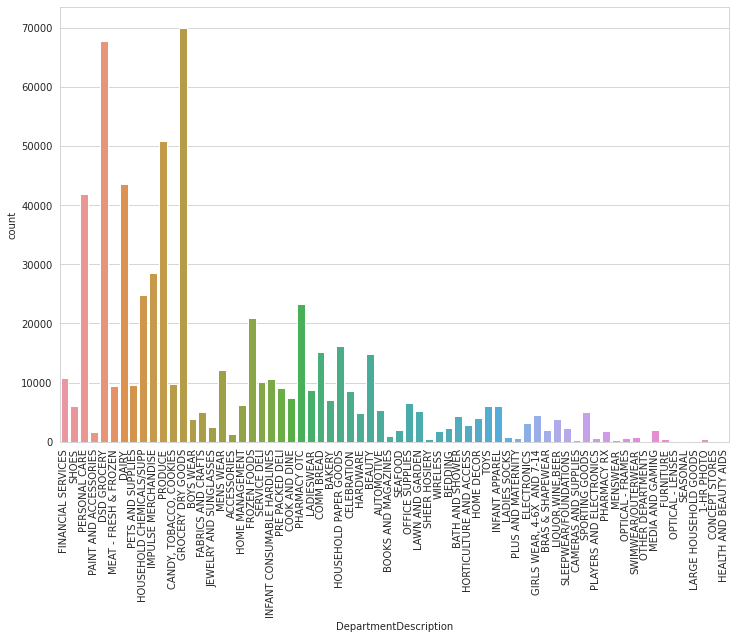

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='DepartmentDescription',data=train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train['TripType'].value_counts().describe()

count        38.000000
mean      16877.631579
std       30921.087184
min          34.000000
25%        2983.250000
50%        6575.500000
75%       18912.500000
max      173031.000000
Name: TripType, dtype: float64

In [ ]:
train.loc[train['ScanCount'].isnull()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


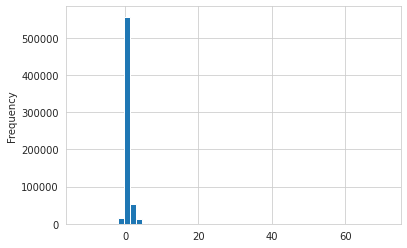

In [ ]:
train['ScanCount'].plot.hist(bins=50)

In [ ]:
train['ScanCount'].value_counts()

 1     556283
 2      52839
-1      14105
 3       9421
 4       4530
 5       1378
 6        865
-2        802
 8        246
 7        228
-3        142
 10       130
 9         88
-4         76
 12        60
 11        45
-5         16
 14        15
 13        13
 15        12
-6         10
 20         7
 16         6
 19         4
 18         4
 24         4
 23         3
 17         3
 25         3
 22         2
-9          2
 71         1
 51         1
 30         1
 31         1
-7          1
 46         1
-12         1
-10         1
Name: ScanCount, dtype: int64

In [ ]:
train.loc[train.duplicated(subset=['TripType', 'VisitNumber', 'Weekday', 'Upc', 'DepartmentDescription', 'FinelineNumber'], keep=False)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0
11,26,8,Friday,8.867930e+10,2,PAINT AND ACCESSORIES,3504.0
14,26,8,Friday,8.867930e+10,-1,PAINT AND ACCESSORIES,3504.0
15,26,8,Friday,2.238400e+09,2,PAINT AND ACCESSORIES,3565.0
180,37,86,Friday,7.516665e+10,2,PRODUCE,7841.0
...,...,...,...,...,...,...,...
646845,40,191298,Sunday,6.811310e+10,1,BEAUTY,4541.0
646984,38,191337,Sunday,2.259120e+10,1,MEAT - FRESH & FROZEN,1301.0
646985,38,191337,Sunday,2.259120e+10,-1,MEAT - FRESH & FROZEN,1301.0
647004,38,191337,Sunday,2.261680e+10,-1,MEAT - FRESH & FROZEN,6405.0


In [ ]:
train = train.groupby(['Upc', 'TripType', 'VisitNumber', 'Weekday','DepartmentDescription', 'FinelineNumber'])['ScanCount'].sum().reset_index()

In [ ]:
train.loc[train.duplicated(subset=['TripType', 'VisitNumber', 'Weekday','Upc', 'DepartmentDescription', 'FinelineNumber'], keep=False)]

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount


In [ ]:
train = train.loc[train['ScanCount'] != 0]

In [ ]:
train['ScanCount'].value_counts()

 1     548378
 2      49714
 3       9450
-1       7193
 4       4887
 5       1539
 6        938
-2        280
 8        277
 7        236
 10       149
-3         85
 9         77
 12        70
-4         40
 11        40
 14        16
 15        15
-5         15
 13        14
-6          7
 24         6
 20         6
 17         5
 19         5
 18         5
-8          4
 16         3
 23         3
 22         2
 25         2
-7          2
 72         1
 47         1
-10         1
 30         1
 31         1
 52         1
Name: ScanCount, dtype: int64

In [ ]:
train.loc[train['VisitNumber'].isnull()]

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount


In [ ]:
len(train['VisitNumber'].unique())

93086

In [ ]:
number_item_purchase = pd.DataFrame()

In [ ]:
number_item_purchase['unique_count'] = train.groupby(['VisitNumber'])['Upc'].count()

In [ ]:
number_item_purchase['unique_count'].head()

VisitNumber
5      1
7      2
8     20
9      3
10     3
Name: unique_count, dtype: int64

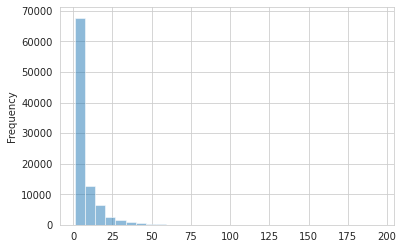

In [ ]:
number_item_purchase['unique_count'].plot.hist(bins=30, alpha=0.5)

In [ ]:
number_item_purchase['unique_count'].describe()

count    93086.000000
mean         6.697774
std          8.418281
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        195.000000
Name: unique_count, dtype: float64

In [ ]:
number_item_purchase['item_sum'] = train.groupby(['VisitNumber'])['ScanCount'].sum()

In [ ]:
number_item_purchase['item_sum'].head()

VisitNumber
5     -1
7      2
8     27
9      3
10     3
Name: item_sum, dtype: int64

In [ ]:
number_item_purchase['item_sum'].head()

VisitNumber
5     -1
7      2
8     27
9      3
10     3
Name: item_sum, dtype: int64

In [ ]:
number_item_purchase['item_sum'].describe()

count    93086.000000
mean         7.623327
std         10.267037
min        -37.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        306.000000
Name: item_sum, dtype: float64

In [ ]:
number_item_purchase = number_item_purchase.reset_index().merge(train[['TripType', 'VisitNumber', 'Weekday']].drop_duplicates(), on='VisitNumber')

In [ ]:
number_item_purchase.shape

(93086, 5)

In [ ]:
number_item_purchase.head()

,VisitNumber,unique_count,item_sum,TripType,Weekday
0,5,1,-1,999,Friday
1,7,2,2,30,Friday
2,8,20,27,26,Friday
3,9,3,3,8,Friday
4,10,3,3,8,Friday


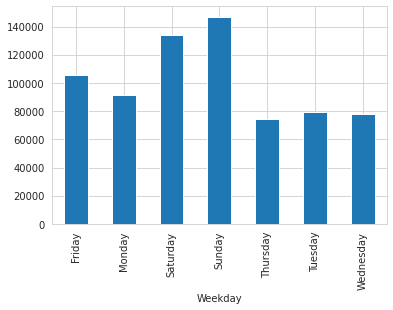

In [ ]:
train.groupby(['Weekday'])['ScanCount'].sum().plot.bar()

In [ ]:
len(train['DepartmentDescription'].unique())

68

In [ ]:
len(train['DepartmentDescription'].unique())

68

In [ ]:
train['DepartmentDescription'].value_counts().head(10)


GROCERY DRY GOODS           69016
DSD GROCERY                 66342
PRODUCE                     49563
DAIRY                       43006
PERSONAL CARE               41232
IMPULSE MERCHANDISE         27791
HOUSEHOLD CHEMICALS/SUPP    24352
PHARMACY OTC                22772
FROZEN FOODS                20726
HOUSEHOLD PAPER GOODS       15963
Name: DepartmentDescription, dtype: int64

In [ ]:
train['DepartmentDescription'].value_counts().tail(10)

1-HR PHOTO                337
MENSWEAR                  302
CAMERAS AND SUPPLIES      207
PHARMACY RX               143
OPTICAL - LENSES           85
LARGE HOUSEHOLD GOODS      77
CONCEPT STORES             35
OTHER DEPARTMENTS          29
SEASONAL                   29
HEALTH AND BEAUTY AIDS      2
Name: DepartmentDescription, dtype: int64

In [ ]:
X = number_item_purchase.copy()

In [ ]:
X.head()

,VisitNumber,unique_count,item_sum,TripType,Weekday
0,5,1,-1,999,Friday
1,7,2,2,30,Friday
2,8,20,27,26,Friday
3,9,3,3,8,Friday
4,10,3,3,8,Friday


In [ ]:
cat = train.groupby(['VisitNumber', 'DepartmentDescription'])['ScanCount'].sum().reset_index()
cat.head()

,VisitNumber,DepartmentDescription,ScanCount
0,5,FINANCIAL SERVICES,-1
1,7,PERSONAL CARE,1
2,7,SHOES,1
3,8,DAIRY,2
4,8,DSD GROCERY,1


In [ ]:
cat_sale = pd.pivot_table(cat, values=['ScanCount'], index=['VisitNumber'],
               columns=['DepartmentDescription'], aggfunc='sum')\
               .reset_index().fillna(0)
cat_sale.columns = cat_sale.columns.droplevel()
cat_sale = cat_sale.rename(columns={'': "VisitNumber"})

In [ ]:
X = X.merge(cat_sale, on='VisitNumber')

In [ ]:
day_of_week = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

In [ ]:
day = X['Weekday'].map(day_of_week)

In [ ]:
X['sin_day'] = np.sin(2*np.pi*day/7)
X['cos_day'] = np.cos(2*np.pi*day/7)
X = X.drop(['Weekday'], axis=1)

In [ ]:
X.head()

,VisitNumber,unique_count,item_sum,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
0,5,1,-1,999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
1,7,2,2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
2,8,20,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
3,9,3,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
4,10,3,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969


In [ ]:
data = X.copy()
y = X['TripType']
X = X.drop(['TripType', 'VisitNumber'], axis=1)

In [ ]:
y

0        999
1         30
2         26
3          8
4          8
        ... 
93081     25
93082     22
93083     39
93084     39
93085      8
Name: TripType, Length: 93086, dtype: int64

In [ ]:
data.head()

,VisitNumber,unique_count,item_sum,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
0,5,1,-1,999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
1,7,2,2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
2,8,20,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
3,9,3,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
4,10,3,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969


In [ ]:
data.loc[data['TripType'] == 39].head(5)

,VisitNumber,unique_count,item_sum,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
13,26,9,12,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
41,79,8,9,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
72,138,7,7,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
108,224,14,18,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
155,314,5,5,39,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969


In [ ]:
data.loc[data['TripType'] == 40].head(5)

,VisitNumber,unique_count,item_sum,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
53,98,42,50,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
77,152,5,22,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
123,255,33,55,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
131,274,16,19,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
137,283,22,29,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969


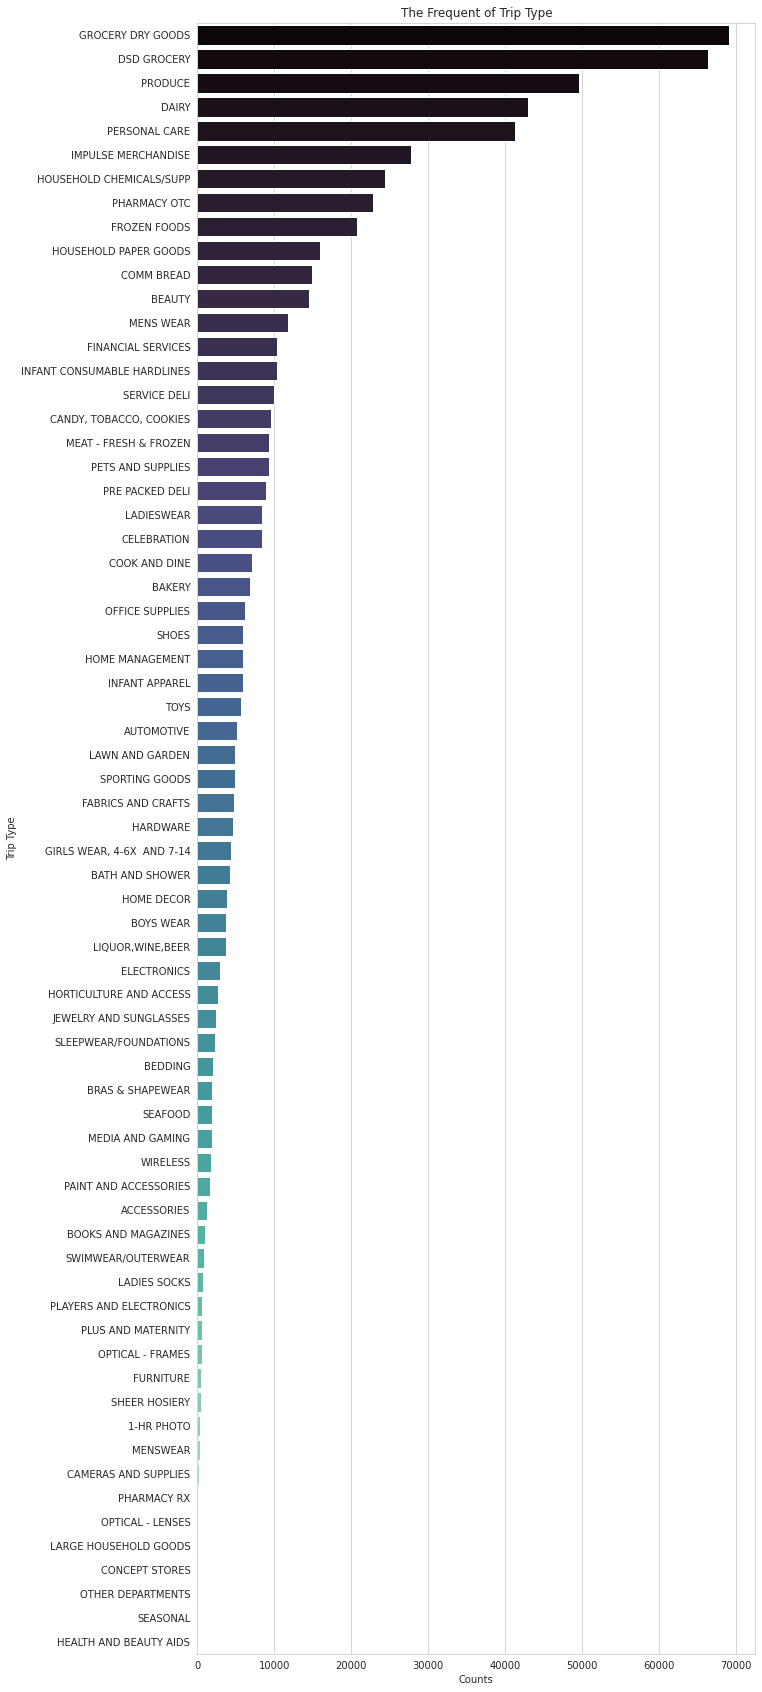

In [ ]:
plt.figure(figsize = (10, 30))

sns.set_style('whitegrid')
ax = sns.countplot(y='DepartmentDescription', data=train, palette='mako', order=train['DepartmentDescription'].value_counts().index)
sx = ax.set(title='The Frequent of Trip Type', xlabel='Counts', ylabel='Trip Type')

In [ ]:
len(train['FinelineNumber'].unique())

5188

In [ ]:
train['FinelineNumber'].value_counts()

5501.0    8150
1508.0    4904
135.0     4440
808.0     4331
0.0       3725
          ... 
6345.0       1
4314.0       1
7160.0       1
3430.0       1
7313.0       1
Name: FinelineNumber, Length: 5188, dtype: int64

In [ ]:
train.groupby(['DepartmentDescription', 'FinelineNumber'])['ScanCount'].sum().reset_index().sort_values(by='ScanCount', ascending=False).head(10)

,DepartmentDescription,FinelineNumber,ScanCount
8666,PRODUCE,5501.0,8098
1859,DAIRY,1508.0,5623
4740,IMPULSE MERCHANDISE,808.0,4703
4713,IMPULSE MERCHANDISE,135.0,4634
2775,FINANCIAL SERVICES,0.0,3717
3339,GROCERY DRY GOODS,3120.0,3710
2113,DSD GROCERY,4606.0,3617
2250,DSD GROCERY,9546.0,3173
1839,DAIRY,1407.0,2947
4711,IMPULSE MERCHANDISE,115.0,2837


In [ ]:
data.loc[data['TripType'] == 5].head(5)

,VisitNumber,unique_count,item_sum,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
58,105,3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
103,218,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
139,285,5,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
193,382,2,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969
215,418,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

37027     8
91532    38
53359    40
47539    33
21317    39
         ..
6265     15
54886    35
76820    27
860      35
15795    15
Name: TripType, Length: 74468, dtype: int64

In [ ]:
#Random Forest

In [ ]:
Rfc = RandomForestClassifier(random_state=42)
Rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred_prob = Rfc.predict_proba(X_test)
y_test_pred = Rfc.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

0.6640885164894188